<a href="https://colab.research.google.com/github/rohan3433/Ev-Charging-Station-Locator-/blob/main/Copy_of_ML_Rohan_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_1 = pd.read_csv('/content/ground_water_quality_2018_post.csv')
df_2 = pd.read_csv('/content/ground_water_quality_2019_post.csv')
df_3 = pd.read_csv('/content/ground_water_quality_2020_post.csv')

In [ ]:
df_1.shape

(374, 26)

In [ ]:
df_1.fillna(df_1.mean(),inplace=True)

<ipython-input-283-c5de193cdd47>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_1.fillna(df_1.mean(),inplace=True)


In [ ]:
df_2.head()

sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  6.45   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  3.85   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.45   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  3.95   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH    EC  ...  SO4-2    Na+     K+  Ca+2    Mg+2  \
0  post monsoon 2019  8.32  2355  ...  377.0  273.0  113.0  80.0  82.654   
1  post monsoon 2019  8.30   565  ...   52.0   89.0   14.0  48.0   4.862   
2  post monsoon 2019  8.12   766  ...   43.0   39.0   10.0  40.0  24.310   
3  post monsoon 2019  7.09   555  ...   31.0   40.0    5.0  40.0  24.310   
4  post monsoon 2019  7.97   735  ...   28.0   44.0   16.0  72.0  34.034   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  539.860197  5.108509            C4S2      -3.797204              P.S.  
1  139.991776  3.196982            C2S1       1.200164              P.S.  
2  199.958882  1.199130            C3S1      -0.199178              P.S.  
3  199.958882  1.229877            C2S1       0.400822              P.S.  
4  319.942434  0.996598            C2S1       0.401151              P.S.  

[5 rows x 26 columns]

In [ ]:
df_2.shape

(364, 26)

In [ ]:
df_2.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   5
season                0
pH                    0
EC                    0
TDS                   0
CO_-2               160
HCO_ -                0
Cl -                  0
F -                   0
NO3-                  0
SO4-2                 0
Na+                   0
K+                    0
Ca+2                  0
Mg+2                  0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

In [ ]:
replaced_names={'CO_-2 ':'CO3', 'HCO_ - ':'HCO3', 'Cl -':'Cl', 'F -':'F','NO3- ':'NO3 ', 'SO4-2':'SO4', 'Na+':'Na', 'K+':'K', 'Ca+2':'Ca', 'Mg+2':'Mg','EC':'E.C'}
df_2.rename(columns=replaced_names,inplace=True)

In [ ]:
df_2.fillna(df_2.mean(), inplace=True)

NameError: name 'df_2' is not defined

In [ ]:
df_3.head()

sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  7.10   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  3.35   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  5.05   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  2.10   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  1.38   

              season  Unnamed: 8    pH  ...    SO4     Na    K    Ca      Mg  \
0  Post-monsoon 2020         NaN  8.01  ...  33.00  171.0  9.0  24.0  72.930   
1  Post-monsoon 2020         NaN  7.77  ...  13.50   70.0  3.0  16.0  53.482   
2  Post-monsoon 2020         NaN  8.21  ...  10.50   65.0  3.0  16.0  48.620   
3  Post-monsoon 2020         NaN   8.3  ...   7.25   31.0  1.0  16.0  29.172   
4  Post-monsoon 2020         NaN  7.67  ...  14.50  129.0  2.0  32.0   5.000   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  359.876645  3.919146            C3S1       0.602467              P.S.  
1  259.909539  1.887814            C3S1      -0.198191              P.S.  
2  239.917763  1.824544            C2S1       0.001645              P.S.  
3  159.950658  1.065714            C2S1      -0.199013              P.S.  
4   82.878289  6.160862            C2S1       3.742434              U.S.  

[5 rows x 27 columns]

In [ ]:
df_3.shape

(368, 27)

In [ ]:
df_3.isnull().sum()

sno                   0
district              0
mandal                0
village               0
lat_gis               0
long_gis              0
gwl                   3
season                0
Unnamed: 8          368
pH                    0
E.C                   0
TDS                   0
CO3                   0
HCO3                  0
Cl                    0
F                     0
NO3                   0
SO4                   0
Na                    0
K                     0
Ca                    0
Mg                    0
T.H                   0
SAR                   0
Classification        0
RSC  meq  / L         0
Classification.1      0
dtype: int64

In [ ]:
df_3.drop('Unnamed: 8',axis=1,inplace=True)

In [ ]:
df_3.fillna(df_3.mean(), inplace=True)

<ipython-input-293-344e6701ce16>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_3.fillna(df_3.mean(), inplace=True)


In [ ]:
df=pd.concat([df_1,df_2,df_3])

In [ ]:
df.head()

sno  district       mandal      village    lat_gis   long_gis   gwl  \
0    1  ADILABAD     Adilabad     Adilabad  19.668300  78.524700  5.09   
1    2  ADILABAD  Bazarhatnur  Bazarhatnur  19.458888  78.350833  5.10   
2    3  ADILABAD  Gudihatnoor  Gudihatnoor  19.525555  78.512222  4.98   
3    4  ADILABAD      Jainath      Jainath  19.730555  78.640000  5.75   
4    5  ADILABAD      Narnoor      Narnoor  19.495665  78.852654  2.15   

              season    pH   E.C  ...    SO4     Na    K    Ca      Mg  \
0  postmonsoon 2018   8.28   745  ...   46.0   49.0  4.0  48.0  38.896   
1  postmonsoon 2018   8.29   921  ...   68.0   42.0  5.0  56.0  63.206   
2  postmonsoon 2018   7.69   510  ...   44.0   45.0  2.0  24.0  38.896   
3  postmonsoon 2018   8.09   422  ...   35.0   27.0  1.0  32.0  19.448   
4  postmonsoon 2018   8.21  2321  ...  280.0  298.0  5.0  56.0  92.378   

          T.H       SAR  Classification  RSC  meq  / L  Classification.1  
0  279.934211  1.273328            C2S1      -1.198684              P.S.  
1  399.893092  0.913166            C3S1      -3.397862              P.S.  
2  219.934211  1.319284            C2S1      -0.398684              P.S.  
3  159.967105  0.928155            C2S1       0.000658              P.S.  
4  519.843750  5.682664            C4S2      -4.396875              P.S.  

[5 rows x 26 columns]

In [ ]:
df.shape

(1106, 26)

In [ ]:
df.isnull().sum()

sno                 0
district            0
mandal              0
village             0
lat_gis             0
long_gis            0
gwl                 0
season              0
pH                  0
E.C                 0
TDS                 0
CO3                 0
HCO3                0
Cl                  0
F                   0
NO3                 0
SO4                 0
Na                  0
K                   0
Ca                  0
Mg                  0
T.H                 0
SAR                 0
Classification      0
RSC  meq  / L       0
Classification.1    0
dtype: int64

In [ ]:
df['Classification'].unique()

array(['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1',
       'C3S4', 'C3S3', 'C2S2', 'OG', 'O.G'], dtype=object)

In [ ]:
df['Classification']=df['Classification'].replace({'O.G':'OG'})

In [ ]:
numcol=['lat_gis', 'long_gis', 'gwl','pH', 'E.C', 'TDS', 'CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR', 'RSC  meq  / L']

In [ ]:
df.loc[261,'pH']=8.05
df['pH']=df['pH'].astype(float)

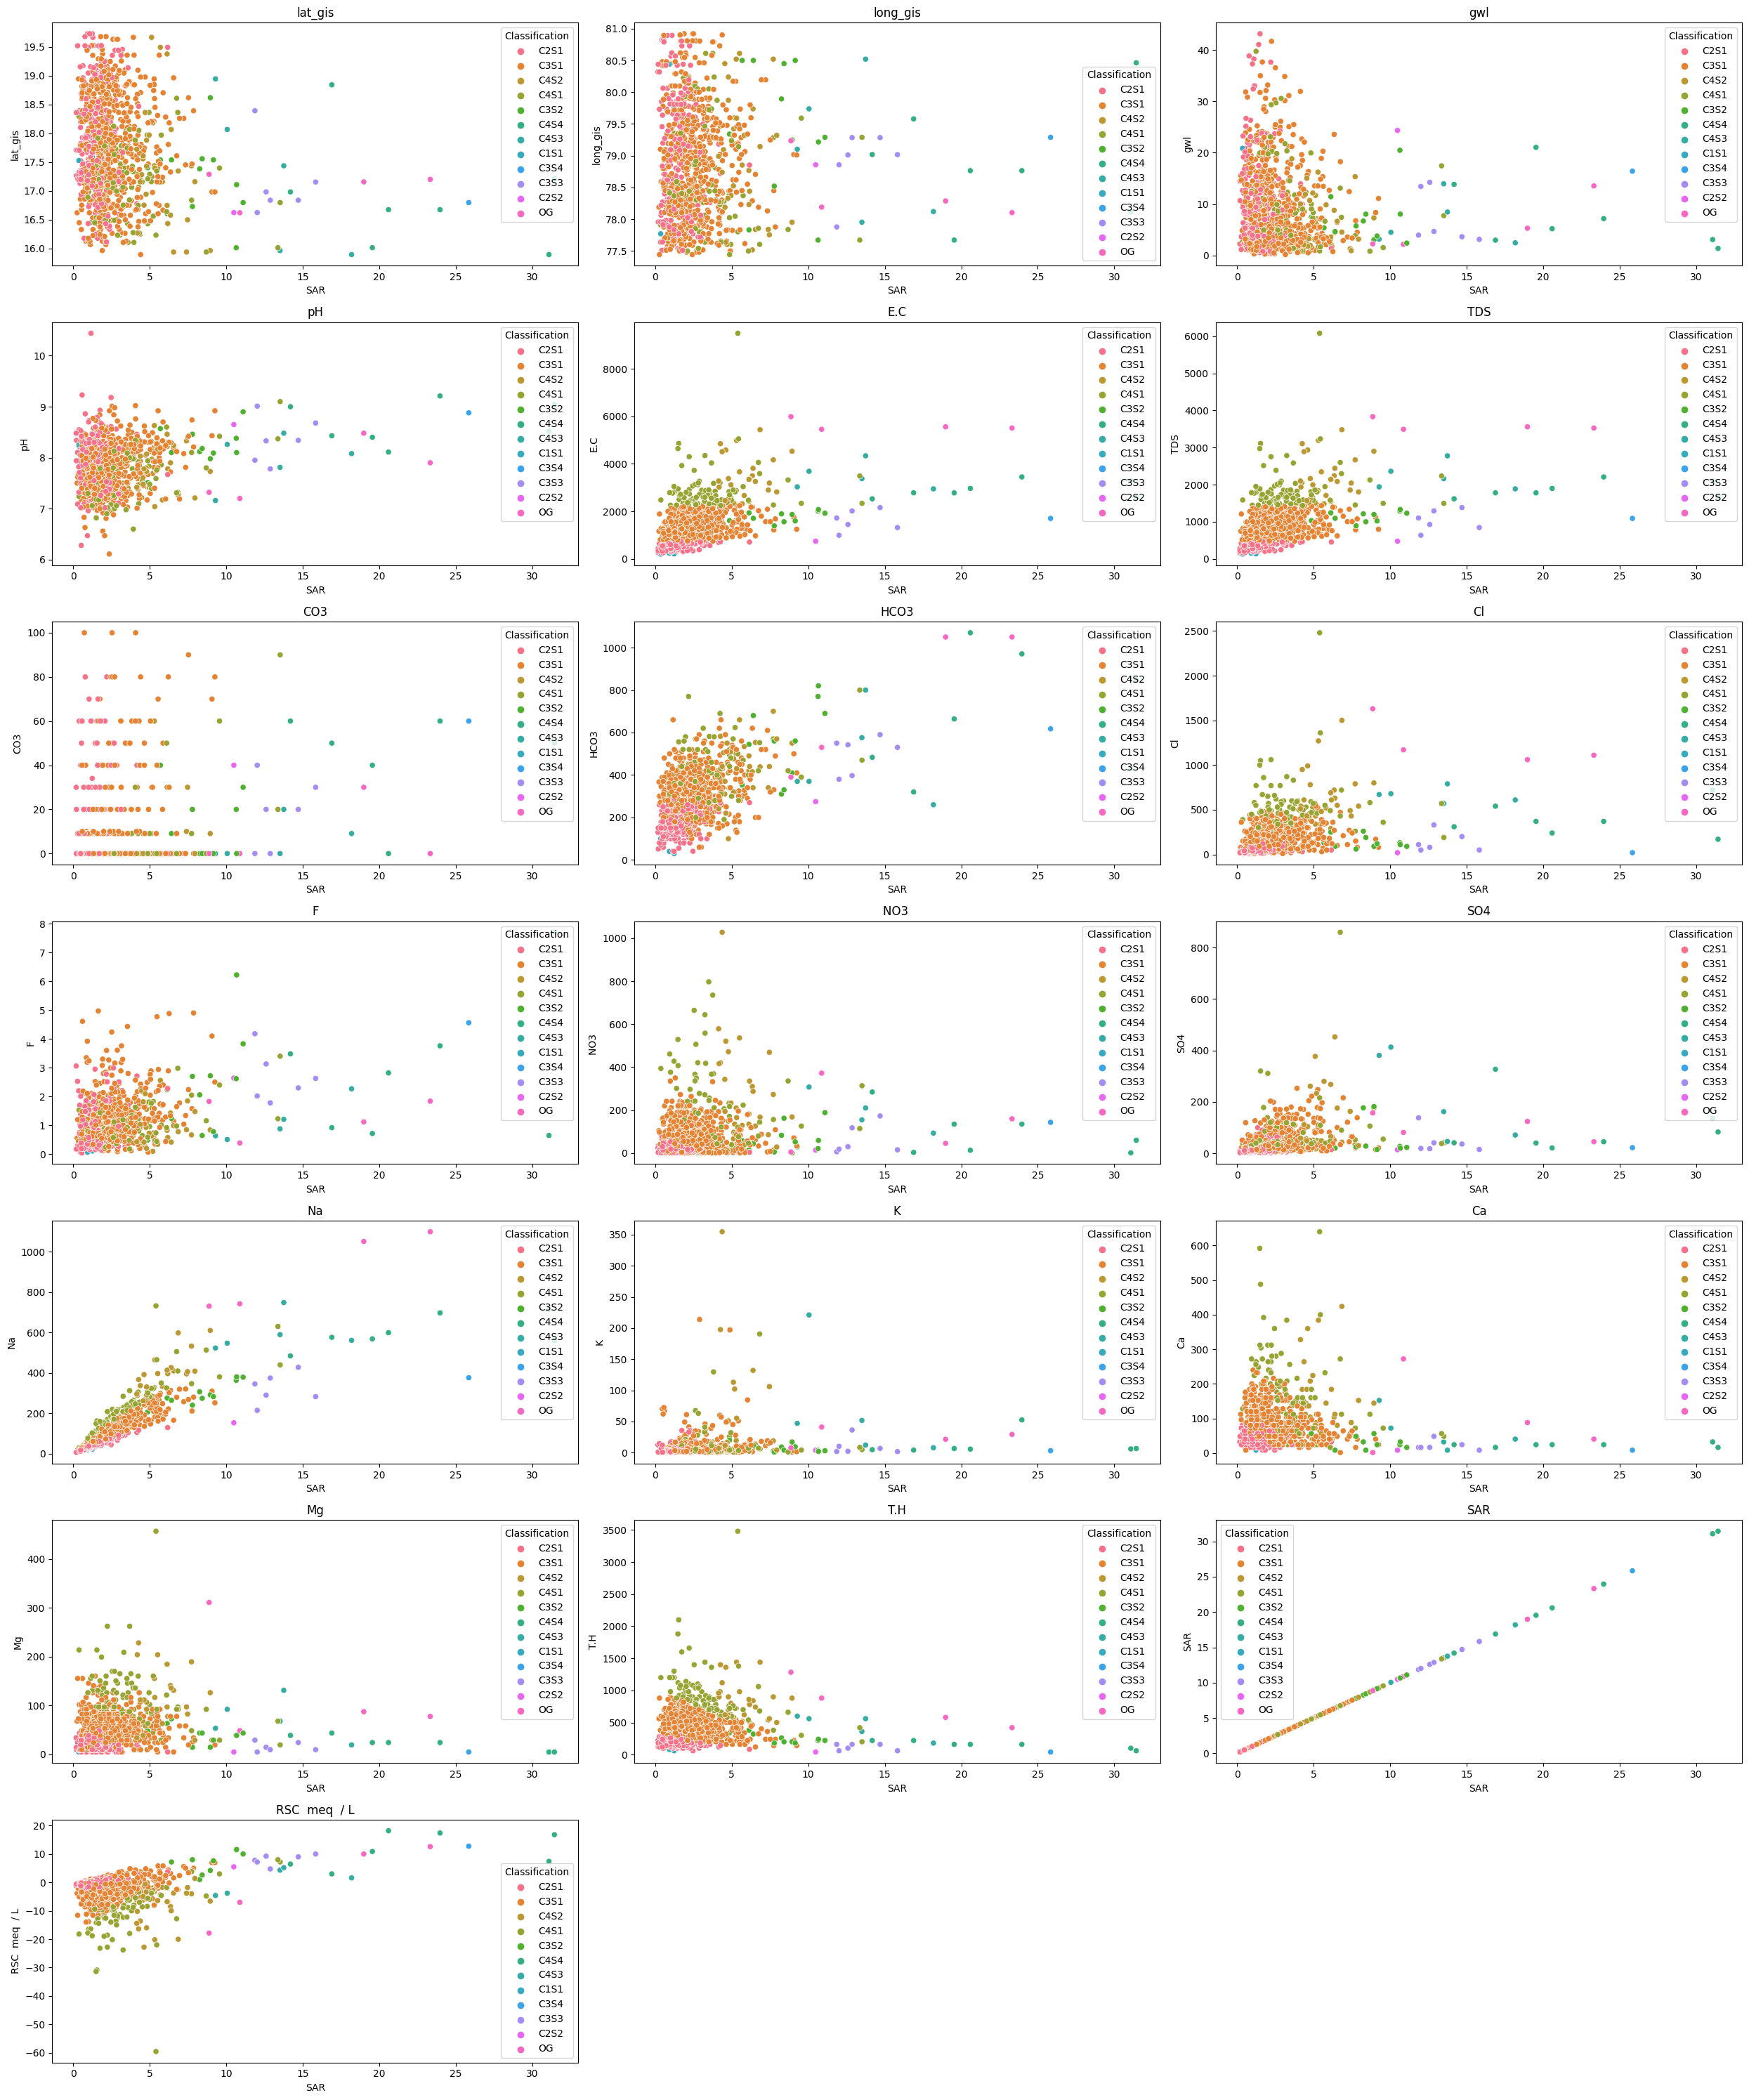

In [ ]:
fig = plt.figure(figsize=(25,30))

for i in range(len(numcol)):
    plt.subplot(7,3,i+1)
    plt.title(numcol[i])
    sns.scatterplot(data=df,x=df['SAR'],y=df[numcol[i]],hue=df['Classification'])
plt.tight_layout()
plt.show()

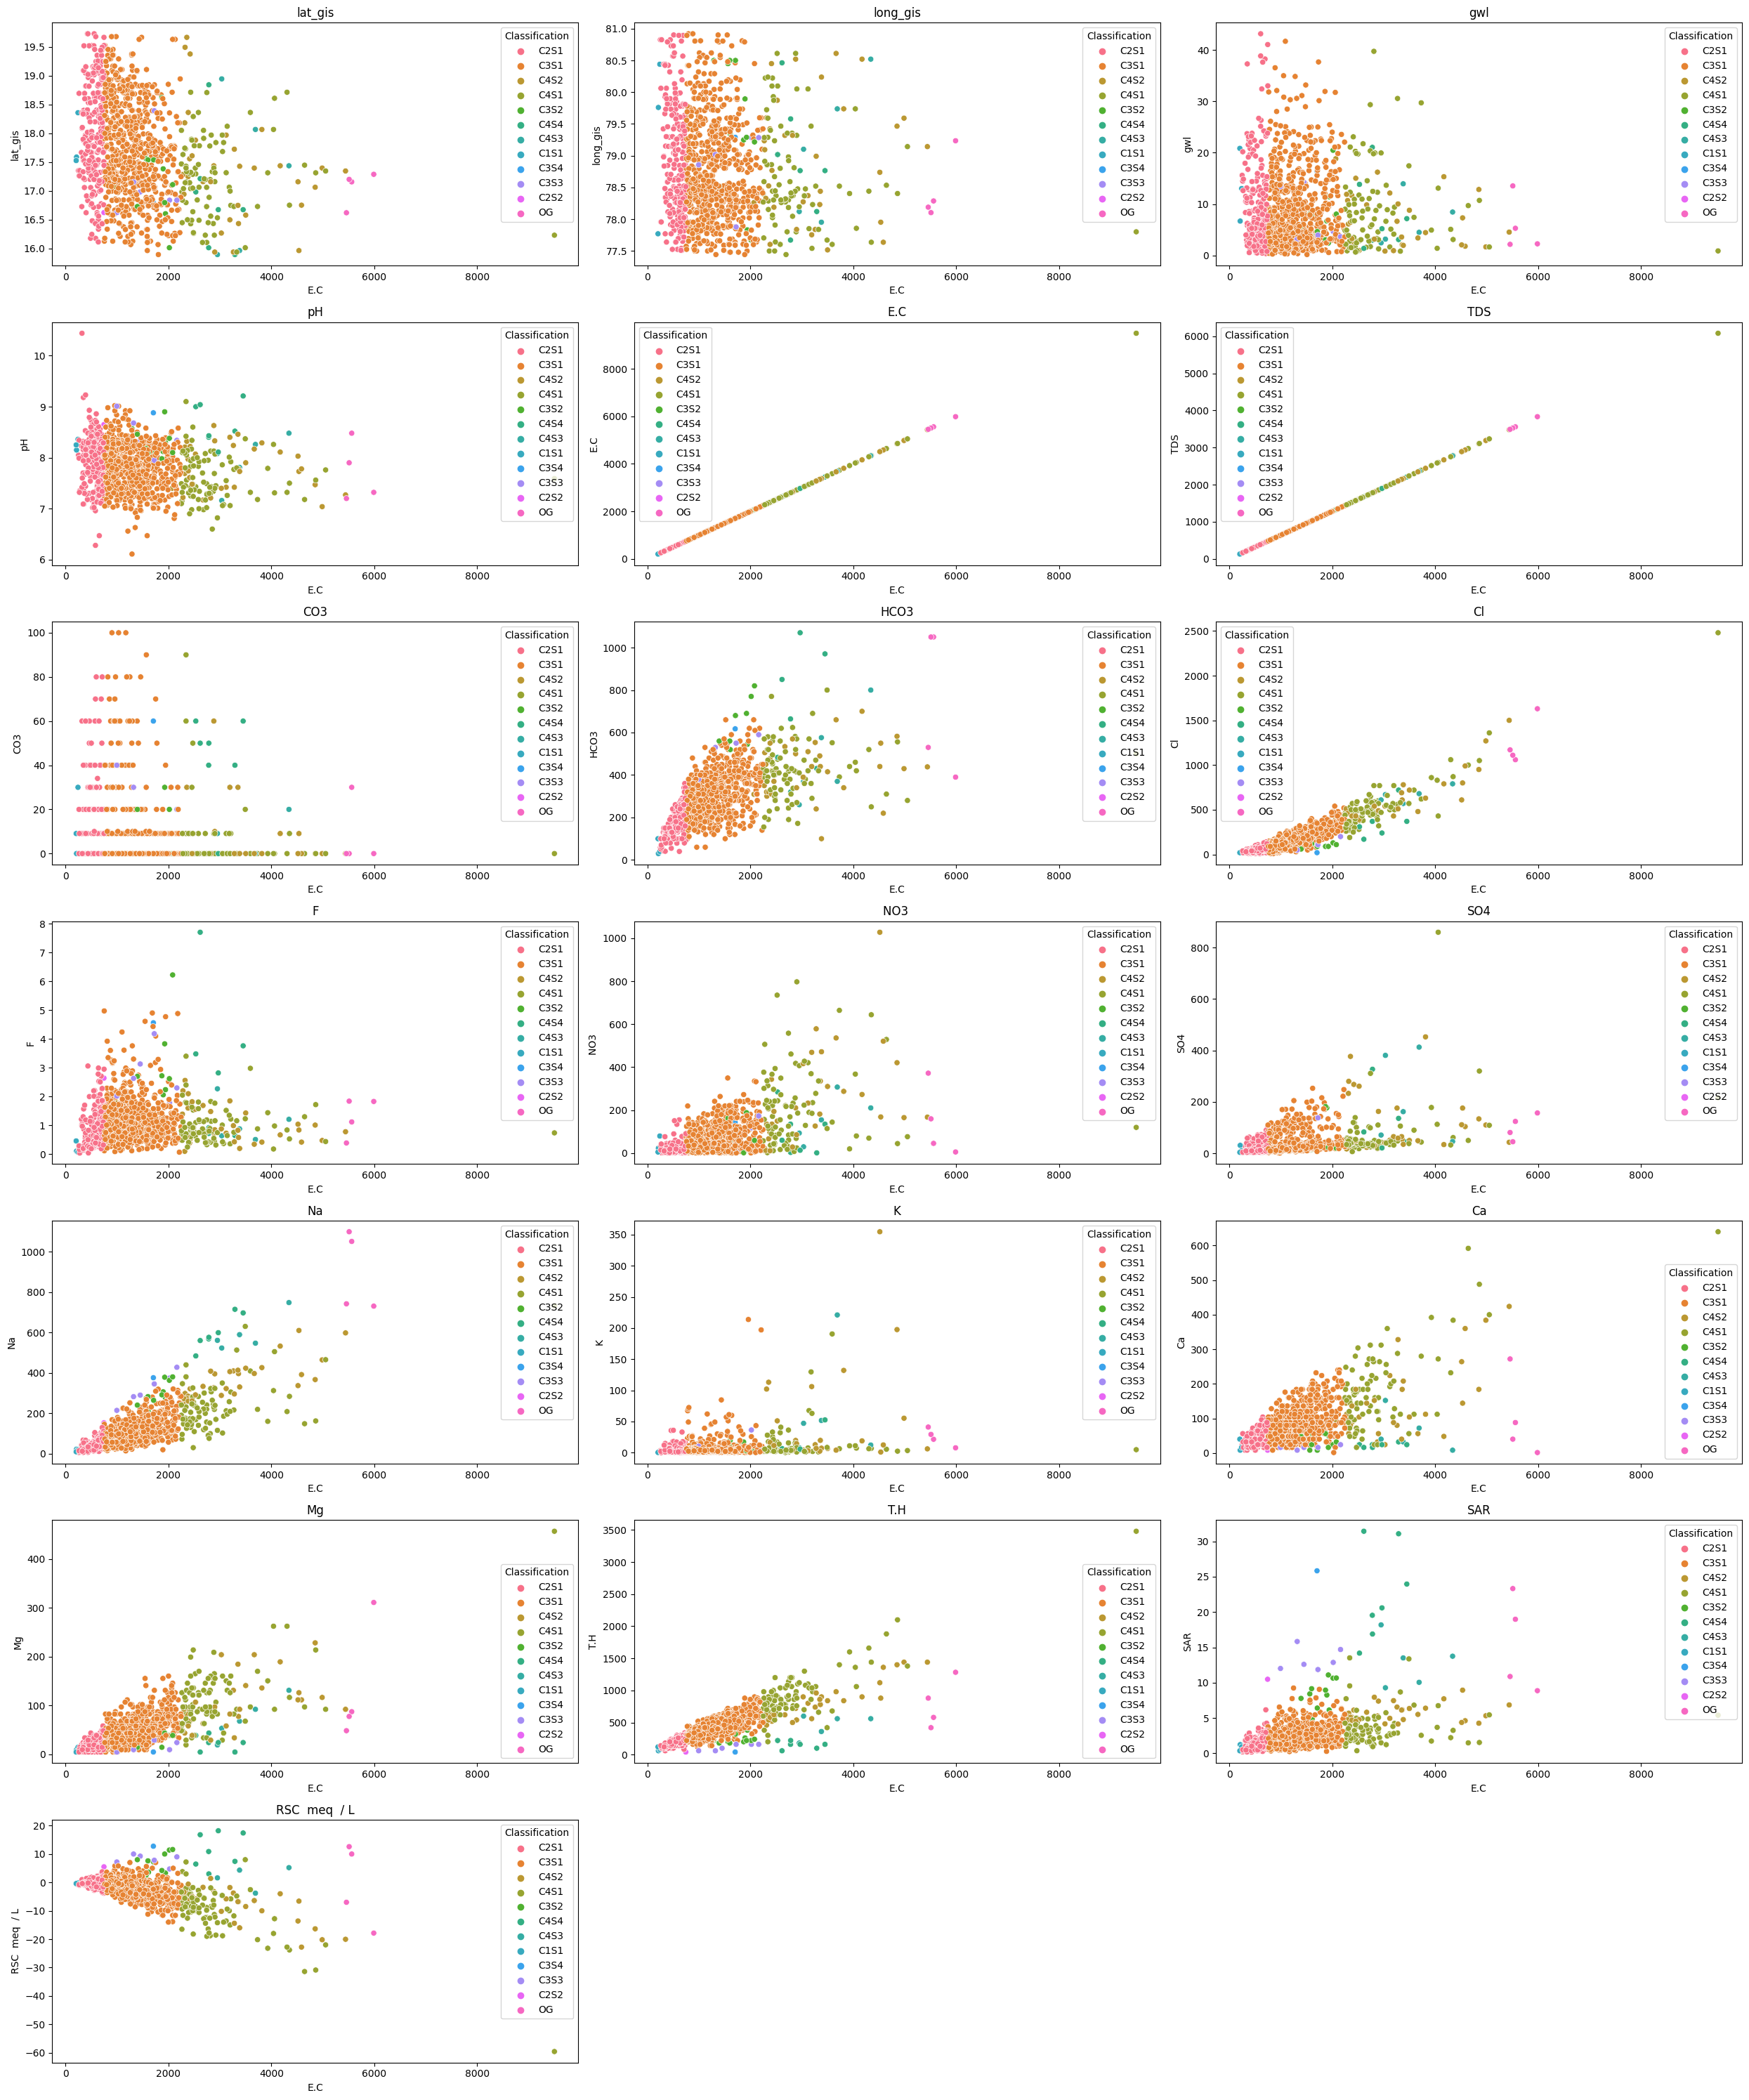

In [ ]:
fig = plt.figure(figsize=(25,30))
for i in range(len(numcol)):
    plt.subplot(7,3,i+1)
    plt.title(numcol[i])
    sns.scatterplot(data=df,x=df['E.C'],y=df[numcol[i]],hue=df['Classification'])
plt.tight_layout()
plt.show()

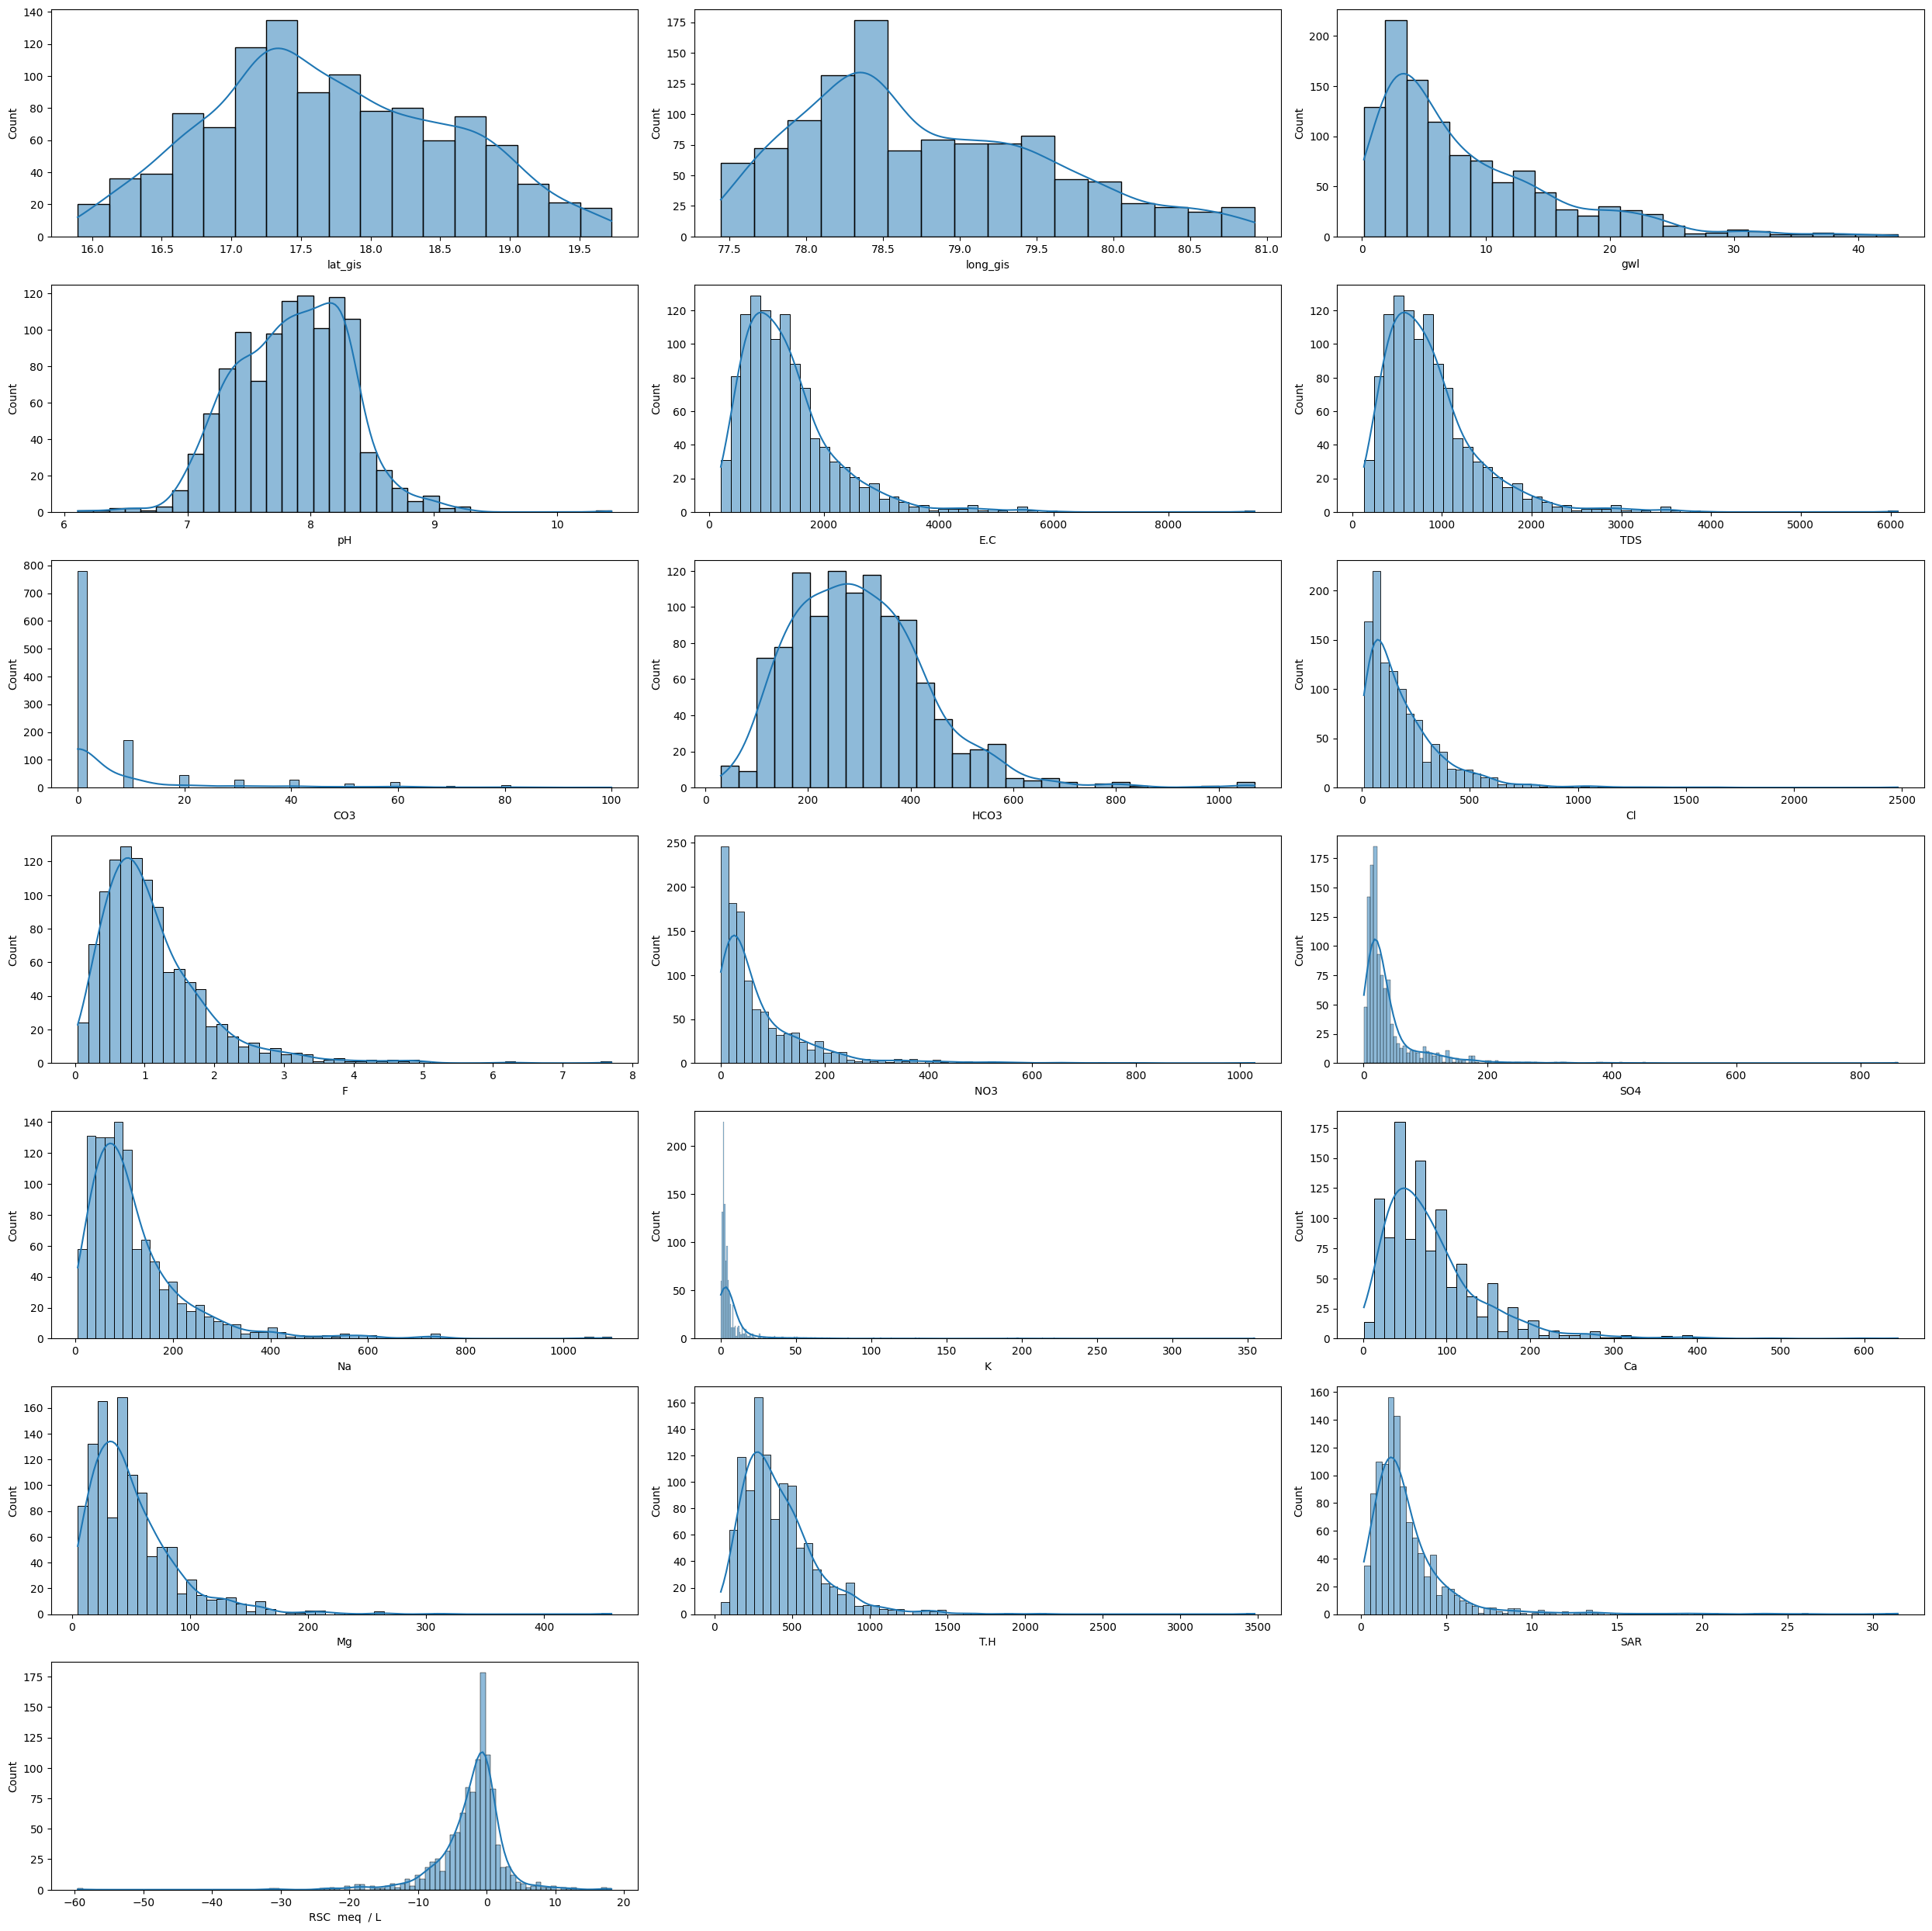

In [ ]:
fig = plt.figure(figsize=(25,25))
for i in range(len(numcol)):
    plt.subplot(7,3,i+1)
    sns.histplot(data=df,x=df[numcol[i]],kde=True)
plt.tight_layout()
plt.show()

In [ ]:
var_features=[ 'gwl','E.C', 'TDS','CO3', 'HCO3', 'Cl', 'F', 'NO3 ', 'SO4',
       'Na', 'K', 'Ca', 'Mg', 'T.H', 'SAR']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
mmsl=MinMaxScaler()
mmsl.fit(df[numcol])

MinMaxScaler()

In [ ]:
df[var_features]=np.log1p(df[var_features])

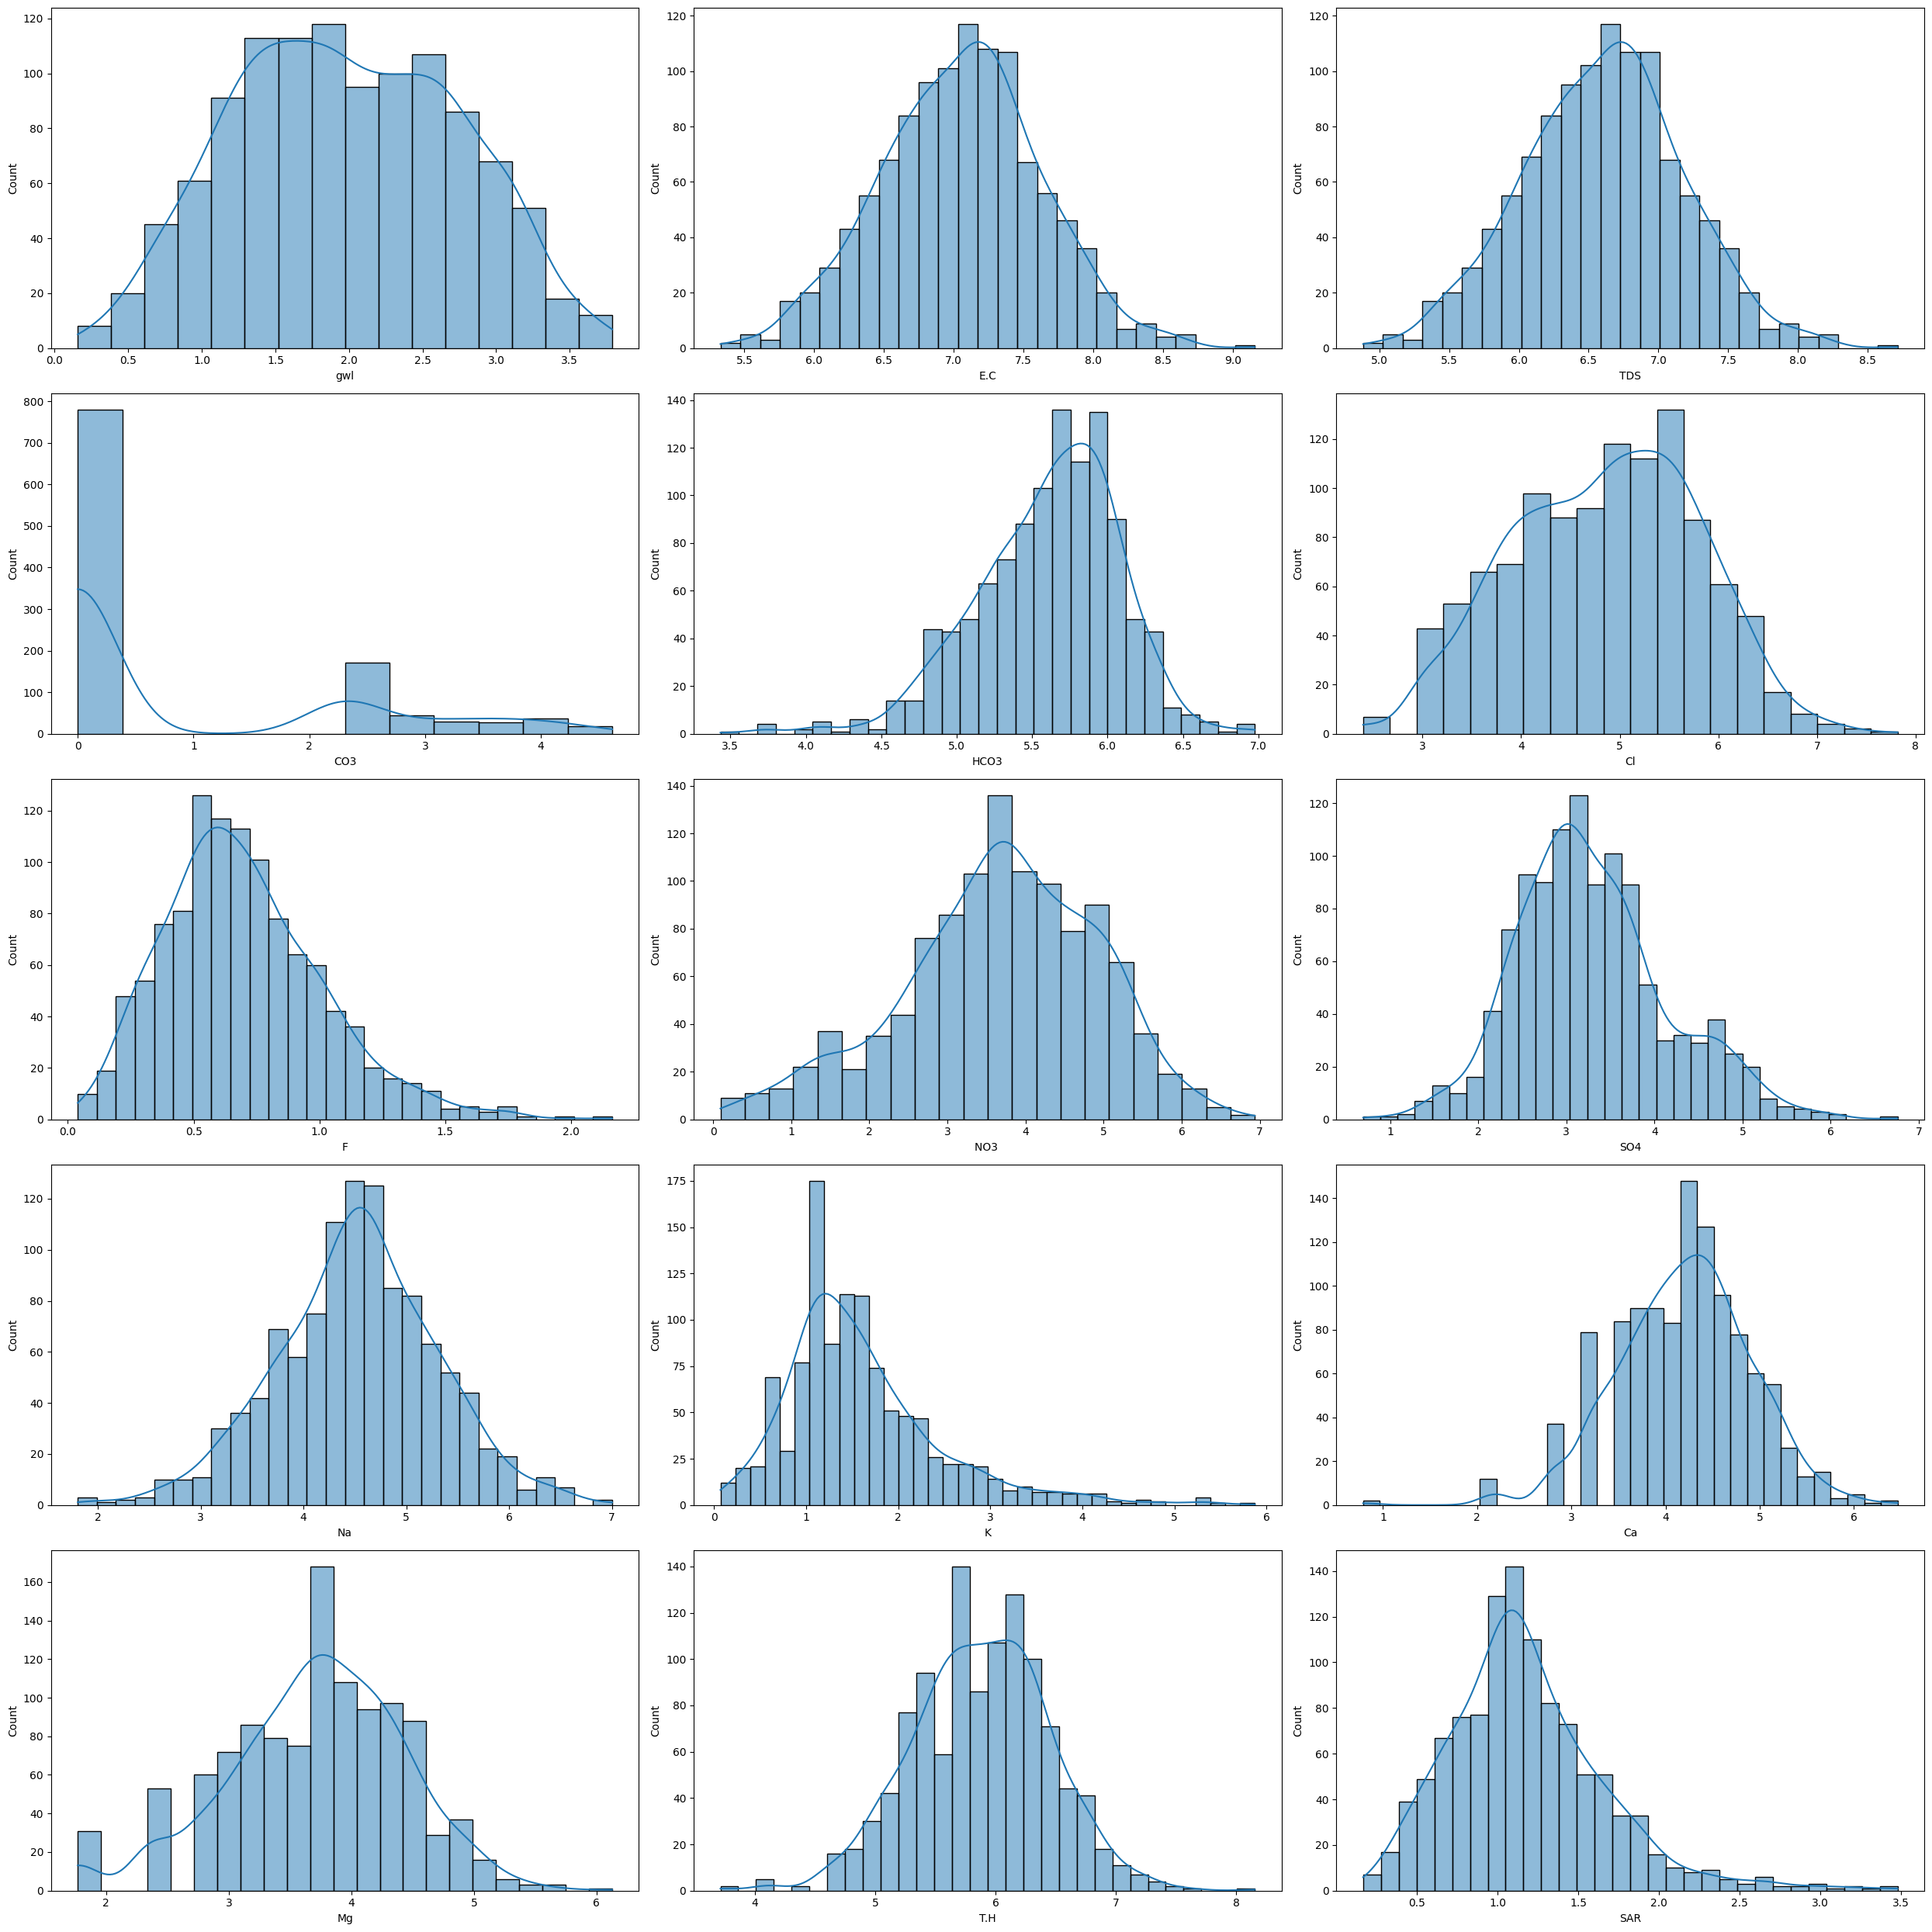

In [ ]:
fig = plt.figure(figsize=(25,25))
for i in range(len(var_features)):
    plt.subplot(5,3,i+1)
    sns.histplot(data=df,x=var_features[i],kde=True)
plt.tight_layout()
plt.show()

In [ ]:
df['Classification'].unique()

array(['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1',
       'C3S4', 'C3S3', 'C2S2', 'OG'], dtype=object)

In [ ]:
df=df[df['Classification']!='OG']

In [ ]:
df['Classification'] = df['Classification'].replace(['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1','C3S4', 'C3S3', 'C2S2'],[2,1,0,0,1,0,0,3,0,1,2])

<ipython-input-311-31d4918f21d0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Classification'] = df['Classification'].replace(['C2S1', 'C3S1', 'C4S2', 'C4S1', 'C3S2', 'C4S4', 'C4S3', 'C1S1','C3S4', 'C3S3', 'C2S2'],[2,1,0,0,1,0,0,3,0,1,2])


In [ ]:
np.dtype(df['Classification'])

dtype('int64')

In [ ]:
df.groupby('Classification')['sno'].count()

Classification
0    136
1    714
2    249
3      3
Name: sno, dtype: int64

In [ ]:
X=df.drop(['sno','Classification','district','mandal','village','E.C','SAR','Classification.1','TDS'],axis=1)
y=df['Classification']

In [ ]:
np.dtype(df['Classification'])

dtype('int64')

In [ ]:
X=pd.get_dummies(X)

In [ ]:
X.head()

lat_gis   long_gis       gwl    pH  CO3      HCO3        Cl         F  \
0  19.668300  78.524700  1.806648  8.28  0.0  5.398163  4.110874  0.364643   
1  19.458888  78.350833  1.808289  8.29  0.0  5.442418  4.394449  0.444686   
2  19.525555  78.512222  1.788421  7.69  0.0  5.303305  3.433987  0.506818   
3  19.730555  78.640000  1.909543  8.09  0.0  5.081404  2.397895  0.457425   
4  19.495665  78.852654  1.147402  8.21  0.0  5.707110  5.831882  1.269761   

       NO3        SO4        Na         K        Ca        Mg       T.H  \
0  3.767617  3.850148  3.912023  1.609438  3.891820  3.686276  5.638121   
1  4.621625  4.234107  3.761200  1.791759  4.043051  4.162097  5.993695   
2  3.748834  3.806662  3.828641  1.098612  3.218876  3.686276  5.397865   
3  2.457010  3.583519  3.332205  0.693147  3.496508  3.017885  5.081200   
4  4.866331  5.638355  5.700444  1.791759  4.043051  4.536656  6.255450   

   RSC  meq  / L  season_Post-monsoon 2020  season_post monsoon 2019  \
0      -1.198684                         0                         0   
1      -3.397862                         0                         0   
2      -0.398684                         0                         0   
3       0.000658                         0                         0   
4      -4.396875                         0                         0   

   season_postmonsoon 2018   
0                         1  
1                         1  
2                         1  
3                         1  
4                         1

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1234)

In [ ]:
np.dtype(y_train)

dtype('int64')

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifiers with different kernels
svm_linear = SVC(kernel='linear', random_state=1234)
svm_poly = SVC(kernel='poly', degree=3, random_state=1234)
svm_rbf = SVC(kernel='rbf', random_state=1234)
svm_sigmoid = SVC(kernel='sigmoid', random_state=1234)

# Fit the models on the training data
svm_linear.fit(X_train, y_train)
svm_poly.fit(X_train, y_train)
svm_rbf.fit(X_train, y_train)
svm_sigmoid.fit(X_train, y_train)

# Evaluate the models
linear_accuracy = svm_linear.score(X_test, y_test)
poly_accuracy = svm_poly.score(X_test, y_test)
rbf_accuracy = svm_rbf.score(X_test, y_test)
sigmoid_accuracy = svm_sigmoid.score(X_test, y_test)

print("Linear Kernel Accuracy:", linear_accuracy)
print("Polynomial Kernel Accuracy:", poly_accuracy)
print("RBF Kernel Accuracy:", rbf_accuracy)
print("Sigmoid Kernel Accuracy:", sigmoid_accuracy)


Linear Kernel Accuracy: 0.9305135951661632
Polynomial Kernel Accuracy: 0.6646525679758308
RBF Kernel Accuracy: 0.6525679758308157
Sigmoid Kernel Accuracy: 0.649546827794562


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


linear_predictions = svm_linear.predict(X_test)
poly_predictions = svm_poly.predict(X_test)
rbf_predictions = svm_rbf.predict(X_test)
sigmoid_predictions = svm_sigmoid.predict(X_test)

# Calculate precision, recall, F1-score
linear_precision = precision_score(y_test, linear_predictions, average='weighted')
linear_recall = recall_score(y_test, linear_predictions, average='weighted')
linear_f1 = f1_score(y_test, linear_predictions, average='weighted')
linear_classification_report = classification_report(y_test, linear_predictions, zero_division=0)

poly_precision = precision_score(y_test, poly_predictions, average='weighted')
poly_recall = recall_score(y_test, poly_predictions, average='weighted')
poly_f1 = f1_score(y_test, poly_predictions, average='weighted')  ``
poly_classification_report = classification_report(y_test, poly_predictions, zero_division=0)

rbf_precision = precision_score(y_test, rbf_predictions, average='weighted')
rbf_recall = recall_score(y_test, rbf_predictions, average='weighted')
rbf_f1 = f1_score(y_test, rbf_predictions, average='weighted')
rbf_classification_report = classification_report(y_test, rbf_predictions, zero_division=0)

sigmoid_precision = precision_score(y_test, sigmoid_predictions, average='weighted')
sigmoid_recall = recall_score(y_test, sigmoid_predictions, average='weighted')
sigmoid_f1 = f1_score(y_test, sigmoid_predictions, average='weighted')
sigmoid_classification_report = classification_report(y_test, sigmoid_predictions, zero_division=0)


print("Linear Kernel Metrics:")
print(f"Precision: {linear_precision}")
print(f"Recall: {linear_recall}")
print(f"F1-score: {linear_f1}")
print("Classification Report:")
print(linear_classification_report)




Linear Kernel Metrics:
Precision: 0.9299642955232079
Recall: 0.9305135951661632
F1-score: 0.9299232558947113
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        41
           1       0.94      0.96      0.95       215
           2       0.90      0.84      0.87        75

    accuracy                           0.93       331
   macro avg       0.93      0.92      0.92       331
weighted avg       0.93      0.93      0.93       331



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# parameter grids for RBF and sigmoid kernels
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # Tuning C and gamma
param_grid_sigmoid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# parameters grid for each kernel
param_grid_linear = {'C': [0.1, 1, 10, 100]}  # Tuning the regularization parameter C for linear kernel
param_grid_poly = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]}  #  polynomial kernel
param_grid_rbf = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # RBF kernel
param_grid_sigmoid = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # sigmoid kernel


# Perform grid search with cross-validation for each SVM model
grid_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5)
grid_poly = GridSearchCV(svm_poly, param_grid_poly, cv=5)
grid_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5)
grid_sigmoid = GridSearchCV(svm_sigmoid, param_grid_sigmoid, cv=5)

# Fit the models on the training data
grid_linear.fit(X_train, y_train)
grid_poly.fit(X_train, y_train)
grid_rbf.fit(X_train, y_train)
grid_sigmoid.fit(X_train, y_train)

# Best parameters and accuracy scores for each kernel
print("Best parameters for linear kernel:", grid_linear.best_params_)
print("Linear Kernel Accuracy:", grid_linear.best_score_)

print("Best parameters for polynomial kernel:", grid_poly.best_params_)
print("Polynomial Kernel Accuracy:", grid_poly.best_score_)

print("Best parameters for RBF kernel:", grid_rbf.best_params_)
print("RBF Kernel Accuracy:", grid_rbf.best_score_)

print("Best parameters for sigmoid kernel:", grid_sigmoid.best_params_)
print("Sigmoid Kernel Accuracy:", grid_sigmoid.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best parameters for linear kernel: {'C': 1}
Linear Kernel Accuracy: 0.9222119815668203
Best parameters for polynomial kernel: {'C': 100, 'degree': 4}
Polynomial Kernel Accuracy: 0.9195810640971931
Best parameters for RBF kernel: {'C': 100, 'gamma': 0.01}
RBF Kernel Accuracy: 0.9208713866778384
Best parameters for sigmoid kernel: {'C': 0.1, 'gamma': 0.1}
Sigmoid Kernel Accuracy: 0.6472140762463343


In [ ]:
from sklearn.metrics import confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sbn

In [ ]:
cm=confusion_matrix(y_test, linear_predictions)
cm

array([[ 39,   2,   0],
       [  2, 206,   7],
       [  0,  12,  63]])

linear


Text(95.72222222222221, 0.5, 'Actual')

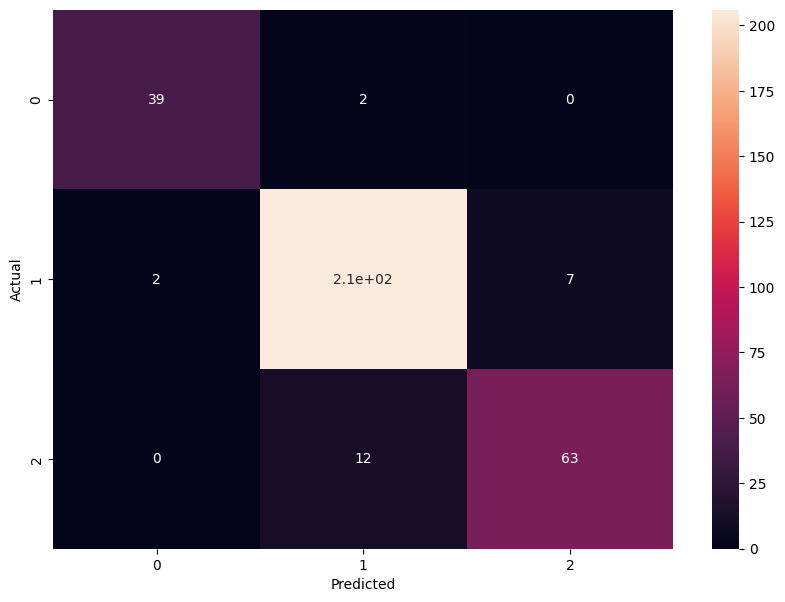

In [ ]:
print("linear")
plt.figure(figsize=(10,7))
sbn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
X1=df.drop(['sno','Classification','district','mandal','village','E.C','SAR','Classification.1','TDS'],axis=1)
y1=df['Classification.1']
df['Classification.1'].unique()
X1=pd.get_dummies(X)

In [ ]:
df['Classification.1'].unique()

array(['P.S.', 'U.S.', 'MR'], dtype=object)

In [ ]:
y1

0      P.S.
1      P.S.
2      P.S.
3      P.S.
4      P.S.
       ... 
363    P.S.
364    P.S.
365    P.S.
366    P.S.
367    P.S.
Name: Classification.1, Length: 1102, dtype: object

In [ ]:
X1=pd.get_dummies(X)

In [ ]:
X1.head()

lat_gis   long_gis       gwl    pH  CO3      HCO3        Cl         F  \
0  19.668300  78.524700  1.806648  8.28  0.0  5.398163  4.110874  0.364643   
1  19.458888  78.350833  1.808289  8.29  0.0  5.442418  4.394449  0.444686   
2  19.525555  78.512222  1.788421  7.69  0.0  5.303305  3.433987  0.506818   
3  19.730555  78.640000  1.909543  8.09  0.0  5.081404  2.397895  0.457425   
4  19.495665  78.852654  1.147402  8.21  0.0  5.707110  5.831882  1.269761   

       NO3        SO4        Na         K        Ca        Mg       T.H  \
0  3.767617  3.850148  3.912023  1.609438  3.891820  3.686276  5.638121   
1  4.621625  4.234107  3.761200  1.791759  4.043051  4.162097  5.993695   
2  3.748834  3.806662  3.828641  1.098612  3.218876  3.686276  5.397865   
3  2.457010  3.583519  3.332205  0.693147  3.496508  3.017885  5.081200   
4  4.866331  5.638355  5.700444  1.791759  4.043051  4.536656  6.255450   

   RSC  meq  / L  season_Post-monsoon 2020  season_post monsoon 2019  \
0      -1.198684                         0                         0   
1      -3.397862                         0                         0   
2      -0.398684                         0                         0   
3       0.000658                         0                         0   
4      -4.396875                         0                         0   

   season_postmonsoon 2018   
0                         1  
1                         1  
2                         1  
3                         1  
4                         1

In [ ]:
from sklearn.model_selection import train_test_split
X_train_1,X_test_1,y_train_1,y_test_1=train_test_split(X1,y1,test_size=0.3,random_state=1234)

In [ ]:
from sklearn.svm import SVC

# Initialize SVM classifiers with different kernels
svm_linear_1 = SVC(kernel='linear', random_state=1234)
svm_poly_1 = SVC(kernel='poly', degree=3, random_state=1234)
svm_rbf_1 = SVC(kernel='rbf', random_state=1234)
svm_sigmoid_1 = SVC(kernel='sigmoid', random_state=1234)

# Fit the models on the training data
'''linear_1 = svm_linear_1.fit(X_train_1, y_train_1)
poly_1 = svm_poly_1.fit(X_train_1, y_train_1)
rbf_1 = svm_rbf_1.fit(X_train_1, y_train_1)
sigmoid_1 = svm_sigmoid_1.fit(X_train_1, y_train_1)'''

svm_linear_1.fit(X_train_1, y_train_1)
svm_poly_1.fit(X_train_1, y_train_1)
svm_rbf_1.fit(X_train_1, y_train_1)
svm_sigmoid_1.fit(X_train_1, y_train_1)

# Evaluate the models
linear_accuracy_1 = svm_linear_1.score(X_test_1, y_test_1)
poly_accuracy_1 = svm_poly_1.score(X_test_1, y_test_1)
rbf_accuracy_1 = svm_rbf_1.score(X_test_1, y_test_1)
sigmoid_accuracy_1 = svm_sigmoid_1.score(X_test_1, y_test_1)

print("Linear Kernel Accuracy:", linear_accuracy_1)
print("Polynomial Kernel Accuracy:", poly_accuracy_1)
print("RBF Kernel Accuracy:", rbf_accuracy_1)
print("Sigmoid Kernel Accuracy:", sigmoid_accuracy_1)


Linear Kernel Accuracy: 0.9848942598187311
Polynomial Kernel Accuracy: 0.8972809667673716
RBF Kernel Accuracy: 0.879154078549849
Sigmoid Kernel Accuracy: 0.879154078549849


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


linear_predictions_1= svm_linear_1.predict(X_test_1)
poly_predictions_1 = svm_poly_1.predict(X_test_1)
rbf_predictions_1 = svm_rbf_1.predict(X_test_1)
sigmoid_predictions_1 = svm_sigmoid_1.predict(X_test_1)

# Calculate precision, recall, F1-score
linear_precision_1 = precision_score(y_test_1, linear_predictions_1, average='weighted')
linear_recall_1 = recall_score(y_test_1, linear_predictions_1, average='weighted')
linear_f1_1 = f1_score(y_test_1, linear_predictions_1, average='weighted')
linear_classification_report_1 = classification_report(y_test_1, linear_predictions_1, zero_division=0)

poly_precision_1 = precision_score(y_test_1, poly_predictions_1, average='weighted')
poly_recall_1 = recall_score(y_test_1, poly_predictions_1, average='weighted')
poly_f1_1 = f1_score(y_test_1, poly_predictions_1, average='weighted')
poly_classification_report_1 = classification_report(y_test_1, poly_predictions_1, zero_division=0)

rbf_precision_1 = precision_score(y_test_1, rbf_predictions_1, average='weighted')
rbf_recall_1 = recall_score(y_test_1, rbf_predictions_1, average='weighted')
rbf_f1_1 = f1_score(y_test_1, rbf_predictions_1, average='weighted')
rbf_classification_report_1 = classification_report(y_test_1, rbf_predictions_1, zero_division=0)

sigmoid_precision_1 = precision_score(y_test_1, sigmoid_predictions_1, average='weighted')
sigmoid_recall_1 = recall_score(y_test_1, sigmoid_predictions_1, average='weighted')
sigmoid_f1_1 = f1_score(y_test_1, sigmoid_predictions_1, average='weighted')
sigmoid_classification_report_1 = classification_report(y_test_1, sigmoid_predictions_1, zero_division=0)


print("Linear Kernel Metrics:")
print(f"Precision: {linear_precision_1}")
print(f"Recall: {linear_recall_1}")
print(f"F1-score: {linear_f1_1}")
print("Classification Report:")
print(linear_classification_report_1)




Linear Kernel Metrics:
Precision: 0.9846825566107112
Recall: 0.9848942598187311
F1-score: 0.98424154745965
Classification Report:
              precision    recall  f1-score   support

          MR       0.92      0.75      0.83        16
        P.S.       0.99      1.00      0.99       291
        U.S.       0.92      1.00      0.96        24

    accuracy                           0.98       331
   macro avg       0.95      0.92      0.93       331
weighted avg       0.98      0.98      0.98       331



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# parameter grids for RBF and sigmoid kernels
param_grid_rbf_1= {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # Tuning C and gamma
param_grid_sigmoid_1 = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# parameters grid for each kernel
param_grid_linear_1 = {'C': [0.1, 1, 10, 100]}  # Tuning the regularization parameter C for linear kernel
param_grid_poly_1 = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]}  #  polynomial kernel
param_grid_rbf_1 = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # RBF kernel
param_grid_sigmoid_1 = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}  # sigmoid kernel


# Perform grid search with cross-validation for each SVM model
grid_linear_1 = GridSearchCV(svm_linear_1, param_grid_linear_1, cv=5)
grid_poly_1 = GridSearchCV(svm_poly_1, param_grid_poly_1, cv=5)
grid_rbf_1 = GridSearchCV(svm_rbf_1, param_grid_rbf_1, cv=5)
grid_sigmoid_1 = GridSearchCV(svm_sigmoid_1, param_grid_sigmoid_1, cv=5)

# Fit the models on the training data
grid_linear_1.fit(X_train_1, y_train_1)
grid_poly_1.fit(X_train_1, y_train_1)
grid_rbf_1.fit(X_train_1, y_train_1)
grid_sigmoid_1.fit(X_train_1, y_train_1)

# Best parameters and accuracy scores for each kernel
print("Best parameters for linear kernel:", grid_linear_1.best_params_)
print("Linear Kernel Accuracy:", grid_linear_1.best_score_)

print("Best parameters for polynomial kernel:", grid_poly_1.best_params_)
print("Polynomial Kernel Accuracy:", grid_poly_1.best_score_)

print("Best parameters for RBF kernel:", grid_rbf_1.best_params_)
print("RBF Kernel Accuracy:", grid_rbf_1.best_score_)

print("Best parameters for sigmoid kernel:", grid_sigmoid_1.best_params_)
print("Sigmoid Kernel Accuracy:", grid_sigmoid_1.best_score_)


Best parameters for linear kernel: {'C': 1}
Linear Kernel Accuracy: 0.9844323418516966
Best parameters for polynomial kernel: {'C': 100, 'degree': 3}
Polynomial Kernel Accuracy: 0.9766652702136573
Best parameters for RBF kernel: {'C': 100, 'gamma': 0.001}
RBF Kernel Accuracy: 0.9805446166736489
Best parameters for sigmoid kernel: {'C': 0.1, 'gamma': 0.1}
Sigmoid Kernel Accuracy: 0.8936489317134478


In [ ]:
linear_predictions_1= grid_linear_1.predict(X_test_1)
poly_predictions_1 = grid_poly_1.predict(X_test_1)
rbf_predictions_1 = grid_rbf_1.predict(X_test_1)
sigmoid_predictions_1 = grid_sigmoid_1.predict(X_test_1)

In [ ]:
cm=confusion_matrix(y_test_1, linear_predictions_1)
cm

array([[ 12,   2,   2],
       [  1, 290,   0],
       [  0,   0,  24]])

In [ ]:
class_labels = ['MR', 'PS', 'US']

linear


Text(95.72222222222221, 0.5, 'Actual')

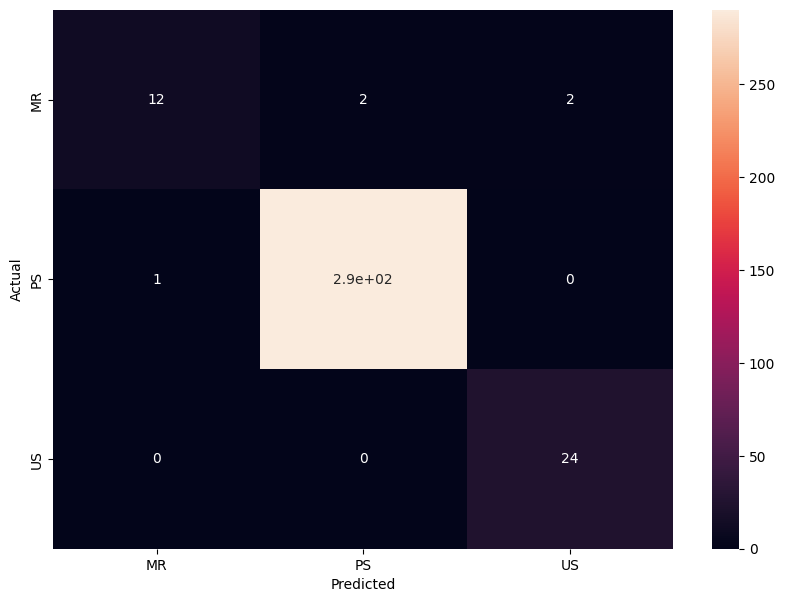

In [ ]:
print("linear")
plt.figure(figsize=(10,7))
sbn.heatmap(cm,annot=True,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
cm=confusion_matrix(y_test_1, poly_predictions_1)
cm

array([[  9,   6,   1],
       [  1, 290,   0],
       [  0,   0,  24]])

poly


Text(95.72222222222221, 0.5, 'Actual')

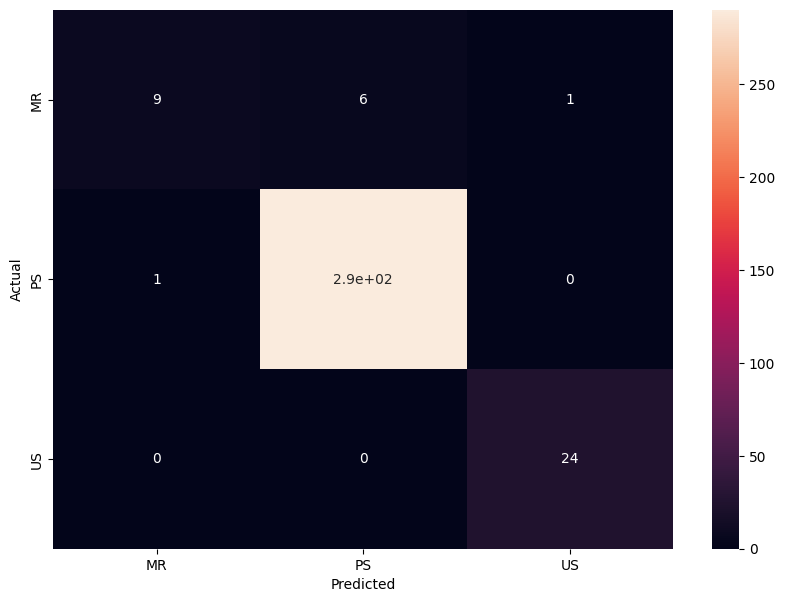

In [ ]:
cm=confusion_matrix(y_test_1, poly_predictions_1)
cm
print("poly")
plt.figure(figsize=(10,7))
sbn.heatmap(cm,annot=True,xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
## **Evaluate RBF Kernel Model**

# Generate confusion matrix
cm = confusion_matrix(y_test_1, rbf_predictions_1)
print("RBF Kernel Confusion Matrix:")
print(cm)

array([[ 10,   4,   2],
       [  1, 290,   0],
       [  0,   0,  24]])

rbf


Text(95.72222222222221, 0.5, 'Actual')

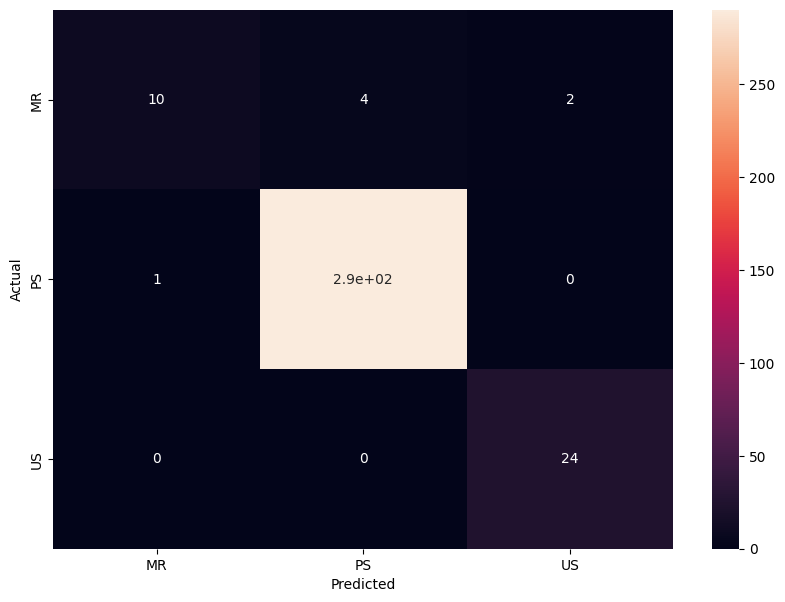

In [ ]:
## **Evaluate RBF Kernel Model**

# Generate confusion matrix
cm = confusion_matrix(y_test_1, rbf_predictions_1)

# Plot confusion matrix as heatmap
print("RBF Kernel Confusion Matrix:")
plt.figure(figsize=(10,7))
sbn.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
## **Evaluate Sigmoid Kernel Model**

# Generate confusion matrix
cm = confusion_matrix(y_test_1, sigmoid_predictions_1)
print("Sigmoid Kernel Confusion Matrix:")
print(cm)

array([[  0,  16,   0],
       [  0, 291,   0],
       [  0,  24,   0]])

In [ ]:
## **Evaluate Sigmoid Kernel Model**

# Generate confusion matrix
cm = confusion_matrix(y_test_1, sigmoid_predictions_1)

# Plot confusion matrix as heatmap
print("Sigmoid Kernel Confusion Matrix:")
plt.figure(figsize=(10,7))
sbn.heatmap(cm, annot=True, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()